<a href="https://colab.research.google.com/github/saransh-goel/HASOC/blob/main/HASOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install datasets
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 24.3 MB/s 
     |████████████████████████████████| 6.6 MB 42.8 MB/s 
     |████████████████████████████████| 163 kB 70.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 19.6 MB/s 
     |████████████████████████████████| 115 kB 67.6 MB/s 
     |████████████████████████████████| 212 kB 71.7 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 27.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size

In [ ]:
import numpy as np

In [ ]:
# from datasets import load_dataset
# raw_datasets = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/HASOC/german_train.csv', 'eval': '/content/drive/MyDrive/HASOC/german_eval.csv'})
# import pandas as pd
# data = pd.read_csv("/content/drive/MyDrive/HASOC/German.csv")
# data
import json
data = json.load(open("/content/drive/MyDrive/HASOC/German.json"))["data"]
hinglish_data_json = json.load(open("/content/drive/MyDrive/HASOC/Hinglish.json"))["data"]
#convert dictionary into array 
def convertIntoList(german_data_json, hinglish_data_json):
  list1 = []
  for a in german_data_json:
    list2 = [a["tweet_id"],a["tweet"],a["label"]]
    list1.append(list2)
  for a in hinglish_data_json:
    list2 = [a["tweet_id"],a["tweet"],a["binary_label"]]
    list1.append(list2)
  return np.array(list1)
def convertIntoListHinglish(data):
  list1 = []
  for a in data:
    list2 = [a["tweet_id"],a["tweet"],a["binary_label"]]
    list1.append(list2)
  return np.array(list1)
binary_data = convertIntoList(data, hinglish_data_json)
print(binary_data)

[['1480483303253680129'
  'Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigungen hatte Christian Lübbers, der auch Kinder gegen #Corona impft, zum Jahreswechsel in seinem E-Mail-Postfach gefunden.\nhttps://t.co/YMXRHTMdyA'
  'NONE']
 ['1480483587866742792'
  'Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigungen hatte Christian Lübbers, der auch Kinder gegen #Corona impft, zum Jahreswechsel in seinem E-Mail-Postfach gefunden.\nhttps://t.co/YMXRHTMdyA@BR24 schlimme Sache.\n\nhttps://t.co/DA934efRNm'
  'NONE']
 ['1480483755055845376'
  'Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigungen hatte Christian Lübbers, der auch Kinder gegen #Corona impft, zum Jahreswechsel in seinem E-Mail-Postfach gefunden.\nhttps://t.co/YMXRHTMdyA@BR24 E-Mails delete! Wichtig ist, die Menschen, die an Sie glauben!!!! https://t.co/Y0Jct9PHQr'
  'NONE']

In [ ]:
print(len(binary_data))

5221


In [ ]:
def catToNum(row):
  if row[2]=="HOF":
    return 1
  else:
    return 0
def returnTweet(row):
  return row[1]
tweets = list(map( returnTweet,binary_data))
labels = list(map( catToNum,binary_data))
print(tweets)
print(labels)

['Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigungen hatte Christian Lübbers, der auch Kinder gegen #Corona impft, zum Jahreswechsel in seinem E-Mail-Postfach gefunden.\nhttps://t.co/YMXRHTMdyA', 'Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigungen hatte Christian Lübbers, der auch Kinder gegen #Corona impft, zum Jahreswechsel in seinem E-Mail-Postfach gefunden.\nhttps://t.co/YMXRHTMdyA@BR24 schlimme Sache.\n\nhttps://t.co/DA934efRNm', 'Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigungen hatte Christian Lübbers, der auch Kinder gegen #Corona impft, zum Jahreswechsel in seinem E-Mail-Postfach gefunden.\nhttps://t.co/YMXRHTMdyA@BR24 E-Mails delete! Wichtig ist, die Menschen, die an Sie glauben!!!! https://t.co/Y0Jct9PHQr', 'Ein HNO-#Arzt aus #Weilheim geht juristisch gegen #Hass-Mails vor. Über 40 Mails mit üblen Beschuldigu

In [ ]:
print(len(tweets))
print(len(labels))

5221
5221


In [ ]:
def countHOFNOT(labels):
  count = [0, 0]
  for a in labels:
    if a==1:
      count[0] += 1
    else:
      count[1] += 1
  return count

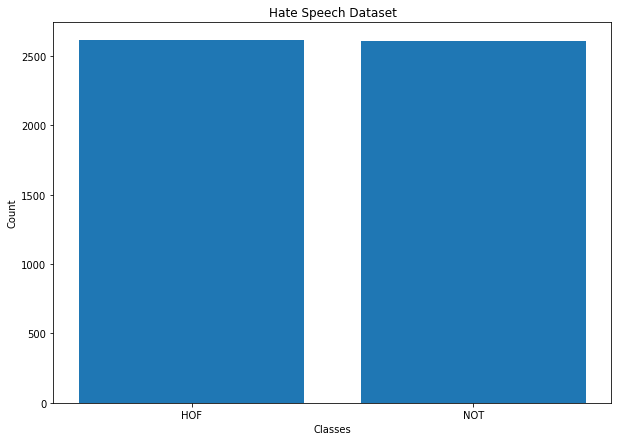

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
count_HOF_NOT = countHOFNOT(labels)
# plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 7]
# initializing the data
x = ["HOF", "NOT"]
y = count_HOF_NOT
 
# plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("Hate Speech Dataset")
 
# Adding label on the y-axis
plt.ylabel('Count')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

In [ ]:
print(count_HOF_NOT)

[2612, 2609]


In [ ]:
total = count_HOF_NOT[0]+count_HOF_NOT[1]
print(count_HOF_NOT[0]/total, count_HOF_NOT[1]/total)

0.500287301283279 0.4997126987167209


In [ ]:
# len_data = len(tweets)
# alpha = 0.2
# len_train = int((1-alpha)*len_data)
# len_eval = len_data-len_train
# train_tweets = tweets[0:len_train]
# train_labels = labels[0:len_train]
# eval_tweets = tweets[len_train:len_data]
# eval_labels = labels[len_train:len_data]
from sklearn.model_selection import train_test_split
train_tweets, eval_tweets, train_labels, eval_labels = train_test_split(tweets, labels, test_size=0.2,random_state=42)

In [ ]:
print(train_tweets)

['कोरोना वैक्सीन एक सुरक्षा कवच है, यह हमें स्वीकार करना होगा।@myogiadityanath मेरी पहेली ट्विटर आईडी ब्लॉक हो चुकी है, कृपया यहाँ मुझे फ़ॉलो करके मुझे प्रोत्साहित करें। 🙏🏻\n🚩 जय श्रीः राम 🚩@FearlessTaani @myogiadityanath Kis bat k liye', 'Das ist Ricarda Lang. Sie ist dreifach geimpft &amp; hat sich mit Corona infiziert. Sie kann sich &amp; andere Leute anstecken. Die Impfung ist nur Selbstschutz, war nie Fremdschutz. Ricarda ist für „My Body, my Choice“. Deshalb will sie eine allg. Impfpflicht.\n\nSei nicht wie Ricarda. 🙂 https://t.co/9xp1O2MAoZ@manaf12hassan Ist das eine Aufnahme mit einen Weitwinkelobjektiv?😁', 'No nation can claim itself to be safe if the security of its own PM gets compromised. I condemn, in the strongest words possible, the cowardly attack on PM Modi by anarchists.\n#BharatStandsWithModi #PMModi@NSaina Madam focus on your game\nYe Gandagi modi ji pe chohd do https://t.co/Xrsr8LBFhp@IsranRar2 @NSaina YOU GO AND SXXK YOUR ITALY BLODDY', 'President Kovind presents 

In [ ]:
def showPercentageBinaryData(label_list):
  num_hof = 0
  num_not = 0
  for label in label_list:
    if label==1:
      num_hof += 1
    else:
      num_not += 1
  print(num_hof/(num_hof+num_not))
  print(num_not/(num_hof+num_not))
showPercentageBinaryData(train_labels)
showPercentageBinaryData(eval_labels)

0.501676245210728
0.49832375478927204
0.49473684210526314
0.5052631578947369


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=1)

In [ ]:
train_tweets, train_labels = oversample.fit_resample(np.array(train_tweets).reshape(-1, 1), train_labels)
eval_tweets, eval_labels = oversample.fit_resample(np.array(eval_tweets).reshape(-1, 1), eval_labels)

NameError: ignored

In [ ]:
showPercentageBinaryData(train_labels)
showPercentageBinaryData(eval_labels)

0.5
0.5
0.5
0.5


In [ ]:
train_tweets = train_tweets.reshape(-1,)
eval_tweets = eval_tweets.reshape(-1,)

AttributeError: ignored

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
print(stopwords.words('english'))
print(stopwords.words('german'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
with open("/content/drive/MyDrive/HASOC/final_stopwords.txt", "r") as f:
  lines = f.readlines()
  print(lines)

['मैं\n', 'मुझको\n', 'मेरा\n', 'अपने आप को\n', 'हमने\n', 'हमारा\n', 'अपना\n', 'हम\n', 'आप\n', 'आपका\n', 'तुम्हारा\n', 'अपने आप\n', 'स्वयं\n', 'वह\n', 'इसे\n', 'उसके\n', 'खुद को\n', 'कि वह\n', 'उसकी\n', 'उसका\n', 'खुद ही\n', 'यह\n', 'इसके\n', 'उन्होने\n', 'अपने\n', 'क्या\n', 'जो\n', 'किसे\n', 'किसको\n', 'कि\n', 'ये\n', 'हूँ\n', 'होता है\n', 'रहे\n', 'थी\n', 'थे\n', 'होना\n', 'गया\n', 'किया जा रहा है\n', 'किया है\n', 'है\n', 'पडा\n', 'होने\n', 'करना\n', 'करता है\n', 'किया\n', 'रही\n', 'एक\n', 'लेकिन\n', 'अगर\n', 'या\n', 'क्यूंकि\n', 'जैसा\n', 'जब तक\n', 'जबकि\n', 'की\n', 'पर\n', 'द्वारा\n', 'के लिए\n', 'साथ\n', 'के बारे में\n', 'खिलाफ\n', 'बीच\n', 'में\n', 'के माध्यम से\n', 'दौरान\n', 'से पहले\n', 'के बाद\n', 'ऊपर\n', 'नीचे\n', 'को\n', 'से\n', 'तक\n', 'से नीचे\n', 'करने में\n', 'निकल\n', 'बंद\n', 'से अधिक\n', 'तहत\n', 'दुबारा\n', 'आगे\n', 'फिर\n', 'एक बार\n', 'यहाँ\n', 'वहाँ\n', 'कब\n', 'कहाँ\n', 'क्यों\n', 'कैसे\n', 'सारे\n', 'किसी\n', 'दोनो\n', 'प्रत्येक\n', 'ज्यादा\n', 'अधिकांश\n', 'अ

In [ ]:
import re
# import spacy
# nlp = spacy.load('de_core_news_md')
def preProcess(data):
  count = 0
  for i in range(0,len(data)):
    data[i] = re.sub('http://\S+|https://\S+', '', data[i])
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    data[i] = emoji_pattern.sub(r'', data[i])  # no emoji
    data[i] = ''.join([j for j in data[i] if not j.isdigit()])  #remove the numbers from text
    list1 = data[i].split()
    new_list = []
    for word in list1:
      # doc = nlp(word)
      # word = ' '.join([x.lemma_ for x in doc]) 
      if word[0]=='@' or len(word)==1 or word[0]=='#':
        count += 1
        continue
      if word in stopwords.words('english') or word in stopwords.words('german') or word in lines or word in stopwords.words('hinglish'):
        count += 1
        continue
      if ord(word[0]) >= 65 and ord(word[0]) <= 90:
        index = 0
        new_character = chr(ord(word[0])+32) 
        word = word[:index] + new_character + word[index+1:]
        new_list.append(word)
      else:
        new_list.append(word)
    str1 = " ".join(new_list)
    str2 = ""
    for a in str1:
      if a=='?' or a=='\'' or a=='\"' or a=='.' or a=='(' or a==')' or a=='{' or a=='}' or a=='[' or a==']' or a==':' or a==',' or a==';' or a=='&' or a=='!' or a=='@':
        continue
      else:
        str2 = str2+a
    data[i] = str2
    # print(str1)
  print(count)
  return data
train_tweets = preProcess(train_tweets)
eval_tweets = preProcess(eval_tweets)
print(train_tweets)
print(eval_tweets)
# tweets = preProcess(tweets)
# print(tweets)

95401
23818
['कोरोना वैक्सीन एक सुरक्षा कवच है यह हमें स्वीकार करना होगा।myogiadityanath मेरी पहेली ट्विटर आईडी ब्लॉक हो चुकी है कृपया यहाँ मुझे फ़ॉलो करके मुझे प्रोत्साहित करें। जय श्रीः राम kis bat', 'das ricarda lang sie dreifach geimpft amp corona infiziert sie amp leute anstecken die impfung selbstschutz nie fremdschutz ricarda „My body choice“ deshalb allg impfpflicht sei ricarda ist aufnahme weitwinkelobjektiv', 'no nation claim safe security pM compromised condemn strongest words possible cowardly attack pM modi anarchists madam focus game ye gandagi modi ji chohd yOU gO aND sXXK yOUR iTALY bLODDY', 'president kovind presents padma shri ms kangana ranaut art she indian film actress filmmaker widely recognised actress excellence she deserves how she it', 'to crying just imagine muslims felt masjid demolished imagined hindus felt destruction thousands temples killing thousands devotees india centuriesStill buy reliving here also case emergency rush nearest pharmacist', '„Grüne gr

In [ ]:
with open("file2.txt","w+") as fp:
  for tweet in train_tweets:
    fp.write(tweet+"\n")
  


In [ ]:
import math
def formtfidf(tweets):
  N = len(tweets)   #total number of docs 
  print(N)
  idf_dic = {}   #number of docs with a term m
  tfidf = []     #list of tfidf dictionary for each doc
  tf = []        #list of tf dictionary for each doc
  for i in range(0,len(tweets)):
    list1 = tweets[i].split()
    tf_dic = {} #record the times term m in doc
    n = len(list1)   #total terms in doc
    for word in list1:
      if word not in tf_dic:
        tf_dic[word] = 1
      else:
        tf_dic[word] += 1
    temp_tf_dic = {}
    for word in tf_dic:
      temp_tf_dic[word] = tf_dic[word]/n
      if word not in idf_dic:
        idf_dic[word] = 1
      else:
        idf_dic[word] += 1
    tf.append(temp_tf_dic)
  idf = []
  for doc in range(0, N):
    temp_idf_dic = {}
    temp_tfidf = {}
    for word in tf[doc]:
      temp_idf_dic[word] = math.log((N+1)/(idf_dic[word]+1))+1
      temp_tfidf[word] = tf[doc][word]*temp_idf_dic[word]
    idf.append(temp_idf_dic)
    tfidf.append(temp_tfidf)
  return tfidf

In [ ]:
tfidf = formtfidf(tweets)

5221


In [ ]:
print(len(tfidf))

5221


In [ ]:
test_tweet = "umar kahalid is bad boy yes he is"
hof_score = 0
not_score = 0
test_tweet_list = test_tweet.split()
for word in test_tweet_list:
  print(word)
  for index in range(0,len(tweets)):
    if word in tfidf[index]:
      if labels[index]==1:
        hof_score += tfidf[index][word]
      else:
        not_score += tfidf[index][word]
print(hof_score, not_score)

umar
kahalid
is
bad
boy
yes
he
is
115.63532536352868 147.56489351810635


In [ ]:
predictions = []
for a in range(len(eval_tweets)):
  hof_score = 0
  not_score = 0
  test_tweet_list = eval_tweets[a].split()
  for word in test_tweet_list:
    # print(word)
    for index in range(0,len(tweets)):
      if word in tfidf[index]:
        if labels[index]==1:
          hof_score += tfidf[index][word]
        else:
          not_score += tfidf[index][word]
  if hof_score > not_score:
    predictions.append(1)
  else:
    predictions.append(0)

In [ ]:
print(predictions)
print(eval_labels)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 

In [ ]:
TP, TN, FP, FN = 0,0,0,0
for a in range(len(predictions)):
  if predictions[a]==eval_labels[a]:
    if predictions[a]==1:
      TP += 1
    else:
      TN += 1
  else:
    if predictions[a]==1:
      FP += 1
    else:
      FN += 1

In [ ]:
accuracy = (TN+TP)/(TN+FP+TP+FN)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1 = (2*precision*recall)/(precision+recall)
print("ACCURACY: ", accuracy)
print("PRECISION: ", precision)
print("RECALL: ", recall)
print("F1: ", f1)

ACCURACY:  0.6851674641148325
PRECISION:  0.6760299625468165
RECALL:  0.6982591876208898
F1:  0.686964795432921


In [ ]:
def retMaxLength(tweets_list):
  max_len = 0
  for tweet in train_tweets:
    temp_len = len(tweet)
    if(temp_len>max_len):
      max_len = temp_len
  return max_len
print(retMaxLength(train_tweets))
print(retMaxLength(eval_tweets))

700
700


In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding
# checkpoint = "bert-base-german-cased"   #64%  , without balancing and with pre process 66%
# checkpoint = "xlm-mlm-ende-1024"  #54%
checkpoint = "xlm-roberta-large"    #79%
# checkpoint = "bert-base-multilingual-uncased"   
# checkpoint = "bert-base-multilingual-cased"  #69%
# checkpoint = "distilbert-base-cased"  #66%
# checkpoint = "distilroberta-base"  #63%
# checkpoint = "google/muril-large-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.22.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/sentencepiece.bpe.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initiali

In [ ]:
max_length = 800

In [ ]:
train_encoding = tokenizer(list(train_tweets), truncation=True,max_length=max_length)
eval_encoding = tokenizer(list(eval_tweets), truncation=True,max_length=max_length)
print(train_encoding)
print(eval_encoding)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import torch
class tweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = tweetDataset(train_encoding, train_labels)
eval_dataset = tweetDataset(eval_encoding, eval_labels)

In [ ]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,roc_auc_score
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification,AutoModel


def compute_metrics(eval_preds):
    metric = load_metric("accuracy", "f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [ ]:
from transformers import Trainer, TrainingArguments
training_args = TrainingArguments("test-trainer", evaluation_strategy ='epoch', per_device_train_batch_size = 2, per_device_eval_batch_size = 2,num_train_epochs=1,learning_rate=1.00742e-05)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,max_length=max_length)
trainer = Trainer(
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    model_init=model_init,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    )

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "output_pas

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/pytorch_model.bin
Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassific

In [ ]:
trainer.train()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots/b2a6150f8be56457baf80c74342cc424080260f0/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-large",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.22.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--xlm-roberta-large/snapshots

Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2319: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  "`max_length` is ignored when `padding`=`True` and there is no truncation strategy. "
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2319: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  "`max_length` is ignored when `padding`=`True` and there is no truncati

TrainOutput(global_step=2088, training_loss=0.7036889083540759, metrics={'train_runtime': 882.4271, 'train_samples_per_second': 4.732, 'train_steps_per_second': 2.366, 'total_flos': 617280756070608.0, 'train_loss': 0.7036889083540759, 'epoch': 1.0})

In [ ]:
predictions = trainer.predict(eval_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
print(preds)

***** Running Prediction *****
  Num examples = 1045
  Batch size = 2
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2319: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  "`max_length` is ignored when `padding`=`True` and there is no truncation strategy. "


[0 0 0 ... 0 0 0]


In [ ]:
from datasets import load_metric
metric1 = load_metric("accuracy")
print(metric1.compute(predictions=preds,references=predictions.label_ids))
metric2 = load_metric("f1")
print(metric2.compute(predictions=preds,references=predictions.label_ids))
metric5 = load_metric("f1")
print(metric5.compute(predictions=preds, references=predictions.label_ids, average='macro'))

{'accuracy': 0.5052631578947369}
{'f1': 0.0}
{'f1': 0.3356643356643357}


In [ ]:
import json
data = json.load(open("/content/drive/MyDrive/HASOC/German_test.json"))["data"]
hinglish_test_data_json = json.load(open("/content/drive/MyDrive/HASOC/Hinglish_test.json"))["data"]
#convert dictionary into array 
def convertIntoListTest(data):
  list1 = []
  for a in data:
    list2 = [a["tweet_id"],a["tweet"]]
    list1.append(list2)
  for a in hinglish_test_data_json:
    list2 = [a["tweet_id"],a["tweet"]]
    list1.append(list2)
  return np.array(list1)
data_test = convertIntoListTest(data)
print(data_test)

[['1530498233398607873'
  'Die Protagonisten der letzten 2 Jahre fordern erneut ein Freifahrtschein für Maßnahmen im Winter, von denen man bis heute nicht weiß, wie sie gewirkt haben, und keiner der Massenmedien fragt, ob sie noch alle Tassen im Schrank haben. Die vierte Gewalt ist tot. #Freiheitsfetisch']
 ['1530498806164365318'
  'Die Protagonisten der letzten 2 Jahre fordern erneut ein Freifahrtschein für Maßnahmen im Winter, von denen man bis heute nicht weiß, wie sie gewirkt haben, und keiner der Massenmedien fragt, ob sie noch alle Tassen im Schrank haben. Die vierte Gewalt ist tot. #Freiheitsfetisch@EddysGeist Die vierte Gewalt ist zum Großteil gekauft']
 ['1530499829901807621'
  'Die Protagonisten der letzten 2 Jahre fordern erneut ein Freifahrtschein für Maßnahmen im Winter, von denen man bis heute nicht weiß, wie sie gewirkt haben, und keiner der Massenmedien fragt, ob sie noch alle Tassen im Schrank haben. Die vierte Gewalt ist tot. #Freiheitsfetisch@EddysGeist Im Großen und

In [ ]:
def catToNum(row):
  if row[2]=="HOF":
    return 1
  else:
    return 0
def returnTweet(row):
  return row[1]
tweets_test = list(map( returnTweet,data_test))
print(tweets_test)

['Die Protagonisten der letzten 2 Jahre fordern erneut ein Freifahrtschein für Maßnahmen im Winter, von denen man bis heute nicht weiß, wie sie gewirkt haben, und keiner der Massenmedien fragt, ob sie noch alle Tassen im Schrank haben. Die vierte Gewalt ist tot. #Freiheitsfetisch', 'Die Protagonisten der letzten 2 Jahre fordern erneut ein Freifahrtschein für Maßnahmen im Winter, von denen man bis heute nicht weiß, wie sie gewirkt haben, und keiner der Massenmedien fragt, ob sie noch alle Tassen im Schrank haben. Die vierte Gewalt ist tot. #Freiheitsfetisch@EddysGeist Die vierte Gewalt ist zum Großteil gekauft', 'Die Protagonisten der letzten 2 Jahre fordern erneut ein Freifahrtschein für Maßnahmen im Winter, von denen man bis heute nicht weiß, wie sie gewirkt haben, und keiner der Massenmedien fragt, ob sie noch alle Tassen im Schrank haben. Die vierte Gewalt ist tot. #Freiheitsfetisch@EddysGeist Im Großen und Ganzen beklagen die Medien sich ja, dass die Maßnahmen abgeschafft wurden 🤨 

In [ ]:
tweets_test = preProcess(tweets_test)

25067


In [ ]:
print(tweets_test)

['letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot vierte gekauft', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot beklagen ja abgeschafft wurden handeln eigentlich', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot letzten zwei mehr enttäuscht egal öffentliche private', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot vierte tot wurde lediglich', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot müsste korrekterweise heißen vierte tot', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot müsste korrekterweise heißen vierte tot los', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot oder gekauft', 'letzten fordern erneut denen heute weiß gewirkt haben fragt haben vierte tot vierte tot gleiche gilt zweite dritte 

In [ ]:
test_tokenizer = AutoTokenizer.from_pretrained(checkpoint)
test_encodings = test_tokenizer(tweets_test, truncation=True, padding=True)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/8d708decd7afb7bec0af233e5338fe1fca3db705/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.22.0",
  "vocab_size": 28996
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/8d708decd7afb7bec0af233e5338fe1fca3db705/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/8d708decd7afb7bec0af233e5338fe1fca3

In [ ]:
import torch
class tweetDatasetTest(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings


    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
test_dataset = tweetDataset(test_encodings)

In [ ]:
print(test_dataset)

In [ ]:
from transformers import Trainer
test_trainer = Trainer(model)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
raw_pred, _, _ = test_trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 1077
  Batch size = 8


In [ ]:
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
def catToNum(row):
  if row[2]=="HOF":
    return 1
  else:
    return 0
def returnID(row):
  return row[0]

# print(tweets_test)

In [ ]:
id = list(map( returnID,data_test))
print(id)

In [ ]:
from sklearn.metrics.pairwise import haversine_distances
import csv
with open("Final_output.csv", "+w") as fp:
  writer = csv.writer(fp)
  header = ["id", "label"]
  writer.writerow(header)
  for a in range(0, len(id)):
    label = "NOT"
    if y_pred[a]==1:
      label = "HOF"
    row = [id[a], label]
    writer.writerow(row)

In [ ]:
score = raw_pred[:, 1]

In [ ]:
df['target'] = y_pred

In [ ]:
df['score'] = score

In [ ]:
df.to_csv('Final_output.csv', index=False)

In [ ]:
predictions = trainer.predict(eval_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
from datasets import load_metric
metric1 = load_metric("accuracy")
print(metric1.compute(predictions=preds,references=predictions.label_ids))
metric2 = load_metric("f1")
print(metric2.compute(predictions=preds,references=predictions.label_ids))
metric5 = load_metric("f1")
print(metric5.compute(predictions=preds, references=predictions.label_ids, average='macro'))